## Objective

Use neural network from tensorflow to apprximate diffusion maps 

In [1]:
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

Using TensorFlow backend.


## training data

In [2]:
with h5py.File('train_data.mat', 'r') as f :
    X = np.transpose( f["x"][()] ) ;
    Y = np.transpose( f["y"][()] ) ;
    label = f["label"][()] ;

In [3]:
x_train = X
y_train = Y
y_label = label

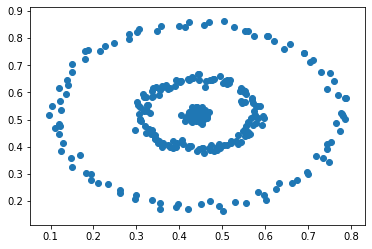

In [4]:
plt.scatter(x_train[:,0] , x_train[:,1])

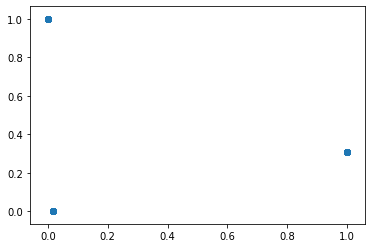

In [5]:
plt.scatter(y_train[:,0] , y_train[:,1])

## Model

In [6]:
model = Sequential()

In [7]:
# dense1
model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
# dense2
model.add(Dropout(0.25)) ;
model.add(Dense(2 , activation = 'relu'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = 'mse' , optimizer = 'sgd')

## Training

In [10]:
train_history = model.fit(x = x_train , y = y_train , epochs = 5000 , batch_size = 10 , verbose = 0 )

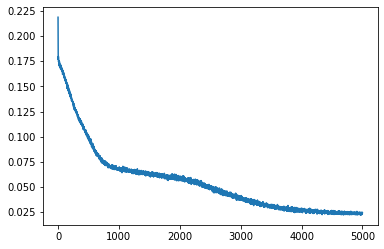

In [11]:
plt.plot(train_history.history['loss'])

## Predict

In [12]:
y_test = model.predict(x_train , batch_size = 1)

Text(0.5, 1.0, 'neural network')

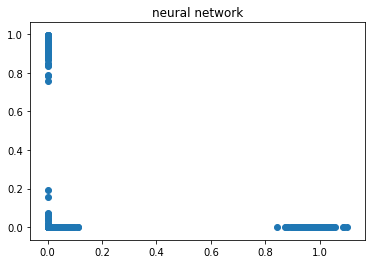

In [13]:
plt.scatter(y_test[:,0] , y_test[:,1])
plt.title('neural network')

Text(0.5, 1.0, 'diffusion maps')

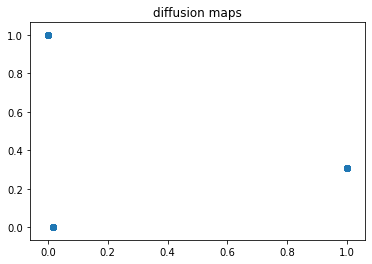

In [14]:
plt.scatter(y_train[:,0] , y_train[:,1])
plt.title('diffusion maps')

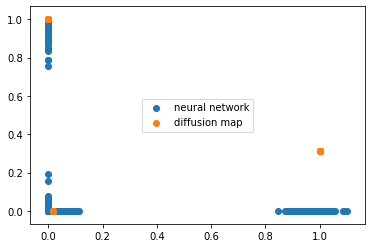

In [15]:
plt.scatter(y_test[:,0] , y_test[:,1])
plt.scatter(y_train[:,0] , y_train[:,1])
plt.legend(["neural network" , "diffusion map"] , loc='center')

## Use neural network for clustering

In [16]:
import random
idx = random.sample(range(299) , 150)
idx.sort()

x_train = X[idx , :]
y_train = label[idx]
x_test = X
y_test = label

In [17]:
# Onehot encoding
y_trainOneHot = np_utils.to_categorical(y_train - 1)
y_testOneHot = np_utils.to_categorical(y_test - 1)

## Model

In [18]:
model = Sequential()

# dense1
model.add(Dense(256 , input_dim = 2 , activation = 'relu'))
# dense2
model.add(Dropout(0.25)) ;
model.add(Dense(3 , activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               768       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


## Training

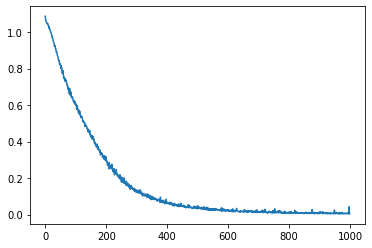

In [19]:
model.compile(loss = 'categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
train_history = model.fit(x = x_train , y = y_trainOneHot , epochs = 1000 , batch_size = 10 , verbose = 0 )
plt.plot(train_history.history['loss'])

## Predict (accuracy = 100 %)

In [22]:
scores = model.evaluate(x_test , y_testOneHot-1)
scores[1]

10/10 [==============================] - 0s 699us/step - loss: -30.0768 - accuracy: 1.0000


1.0

In [21]:
prediction = np.argmax(model.predict(x_test), axis = 1 ) + 1
pd.crosstab(y_test , prediction , rownames = ['label'] , colnames=['predict'])

predict,1,2,3
label,,,
1,99,0,0
2,0,139,0
3,0,0,61
